In [1]:
library(tidyverse)
library(magrittr)
library(readxl)
library(lme4)
library(emmeans)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
exp1 = read_xlsx('CLICK-it_WB_cumulative_LCLs.xlsx', sheet=1)

In [3]:
head(exp1)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AA,HG01112,Vehicle,81.42,9.044,0.002
1,AA,HG01112,Vehicle,70.22,8.711,0.002
1,AA,HG01112,Vehicle,68.05,8.363,0.002
1,AA,HG01112,Thapsi,27.08,10.176,0.002
1,AA,HG01112,Thapsi,30.90,10.219,0.002
1,AA,HG01112,Thapsi,35.83,9.784,0.002


In [4]:
exp2 = read_xlsx('CLICK-it_WB_cumulative_LCLs.xlsx', sheet=2)

In [5]:
head(exp2)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AA,HG01932,Vehicle,109.16,8.949,0.431
1,AA,HG01932,Vehicle,109.00,9.232,0.431
1,AA,HG01932,Vehicle,108.88,8.651,0.431
1,AA,HG01932,Thapsi,45.41,8.341,0.431
1,AA,HG01932,Thapsi,47.33,8.482,0.431
1,AA,HG01932,Thapsi,52.55,7.780,0.431


In [6]:
exp1 %<>% mutate(Experiment = "Exp1")
exp2 %<>% mutate(Experiment = "Exp2", Gel = Gel + 3)

df = rbind(exp1, exp2)

head(df)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background,Experiment
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,AA,HG01112,Vehicle,81.42,9.044,0.002,Exp1
1,AA,HG01112,Vehicle,70.22,8.711,0.002,Exp1
1,AA,HG01112,Vehicle,68.05,8.363,0.002,Exp1
1,AA,HG01112,Thapsi,27.08,10.176,0.002,Exp1
1,AA,HG01112,Thapsi,30.90,10.219,0.002,Exp1
1,AA,HG01112,Thapsi,35.83,9.784,0.002,Exp1


In [7]:
df %<>%
    mutate(TAMRA_ = TAMRA-Background,
           BetaActin_ = BetaActin-Background,
           NormFactor = BetaActin_/max(BetaActin_),
           NormSignal = TAMRA_/NormFactor,
           Experiment = factor(Experiment, levels = c("Exp1", "Exp2")),
           Genotype = factor(Genotype, levels = c("AA", "CC", "EIF2B2")),
           Treatment = factor(Treatment, levels = c("Vehicle", "Thapsi")))

In [8]:
head(df)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background,Experiment,TAMRA_,BetaActin_,NormFactor,NormSignal
<dbl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,AA,HG01112,Vehicle,81.42,9.044,0.002,Exp1,81.42,9.042,0.4267,190.81
1,AA,HG01112,Vehicle,70.22,8.711,0.002,Exp1,70.22,8.709,0.4110,170.87
1,AA,HG01112,Vehicle,68.05,8.363,0.002,Exp1,68.05,8.361,0.3946,172.47
1,AA,HG01112,Thapsi,27.08,10.176,0.002,Exp1,27.08,10.174,0.4801,56.40
1,AA,HG01112,Thapsi,30.90,10.219,0.002,Exp1,30.90,10.217,0.4821,64.09
1,AA,HG01112,Thapsi,35.83,9.784,0.002,Exp1,35.83,9.782,0.4616,77.62


In [9]:
df %>% write_csv("CLICK-it_WB_cumulative_LCLs.csv")

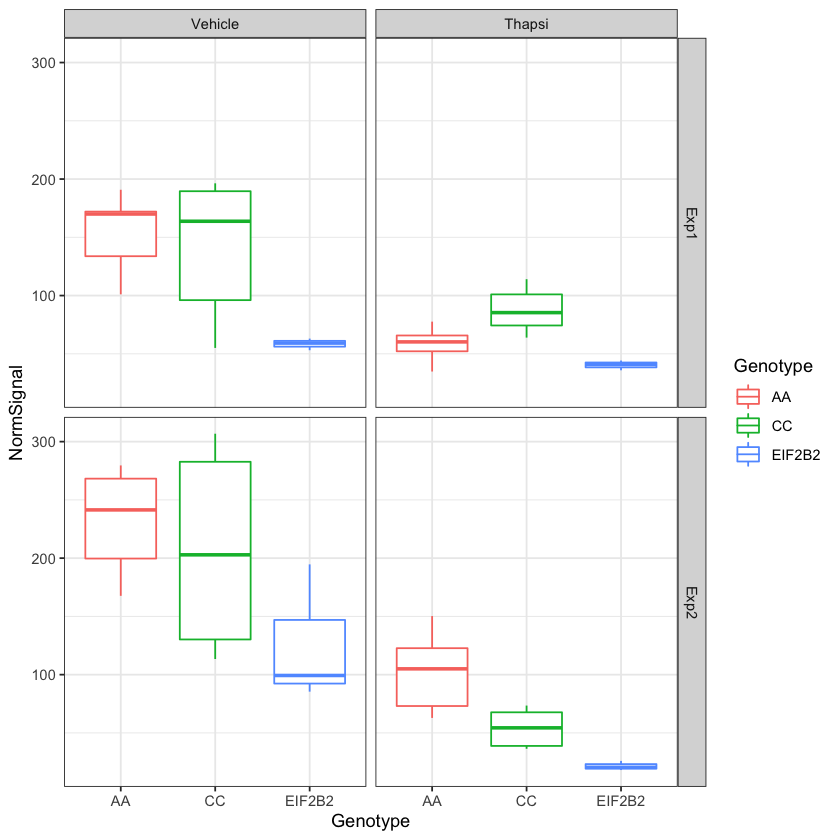

In [10]:
ggplot(df, aes(x=Genotype, y=NormSignal, col=Genotype)) + geom_boxplot() + facet_grid(rows=vars(Experiment), cols=vars(Treatment)) + theme_bw()

In [27]:
lm.full = lmer(NormSignal ~ Genotype * Treatment + (1 | Experiment/Sample), data = df)

In [28]:
fixef(lm.full)

(Intercept)                     GenotypeCC 
                        193.28                         -18.95 
                GenotypeEIF2B2                TreatmentThapsi 
                       -100.82                        -112.93 
    GenotypeCC:TreatmentThapsi GenotypeEIF2B2:TreatmentThapsi 
                          9.43                          51.40

In [29]:
ranef(lm.full)

$`Sample:Experiment`
             (Intercept)
GM20073:Exp1      -2.230
GM20074:Exp2       2.230
HG01112:Exp1      -4.285
HG01125:Exp1     -30.394
HG01142:Exp1      12.250
HG01435:Exp1      -9.372
HG01565:Exp2      38.210
HG01572:Exp2     -41.089
HG01932:Exp2      45.381
HG02260:Exp2     -10.702

$Experiment
     (Intercept)
Exp1      -9.619
Exp2       9.619

with conditional variances for “Sample:Experiment” “Experiment” 

In [30]:
summary(lm.full)

Linear mixed model fit by REML ['lmerMod']
Formula: NormSignal ~ Genotype * Treatment + (1 | Experiment/Sample)
   Data: df

REML criterion at convergence: 573.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.620 -0.467 -0.069  0.420  2.361 

Random effects:
 Groups            Name        Variance Std.Dev.
 Sample:Experiment (Intercept) 1211     34.8    
 Experiment        (Intercept)  342     18.5    
 Residual                      1464     38.3    
Number of obs: 60, groups:  Sample:Experiment, 10; Experiment, 2

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                      193.28      24.41    7.92
GenotypeCC                       -18.95      29.15   -0.65
GenotypeEIF2B2                  -100.82      35.70   -2.82
TreatmentThapsi                 -112.93      15.62   -7.23
GenotypeCC:TreatmentThapsi         9.43      22.09    0.43
GenotypeEIF2B2:TreatmentThapsi    51.40      27.06    1.90

Correlation of Fixed Effects:
        

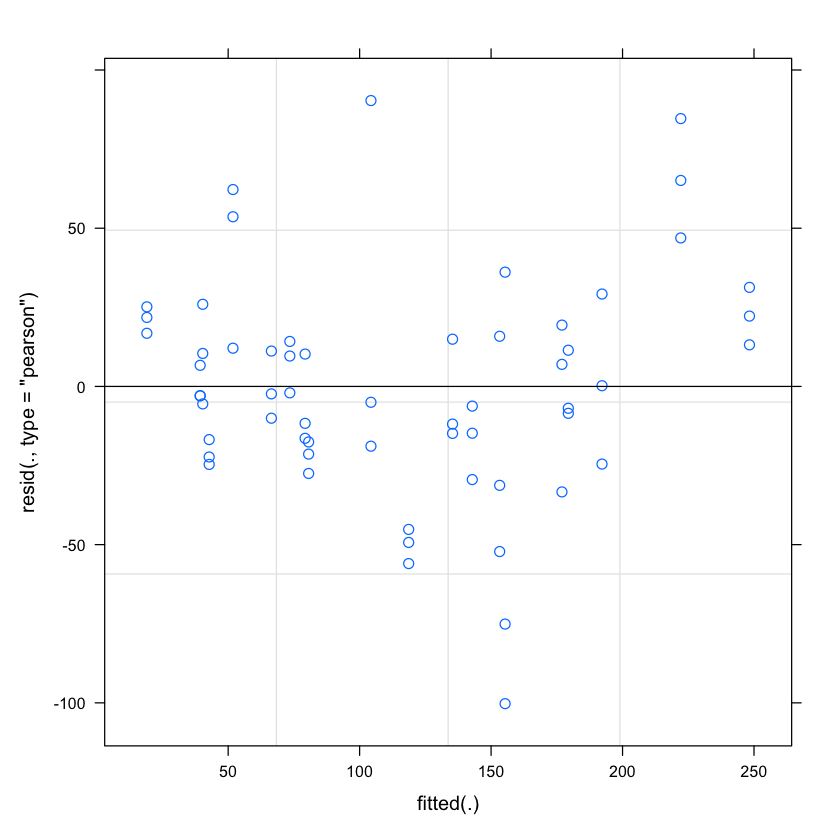

In [31]:
plot(lm.full)

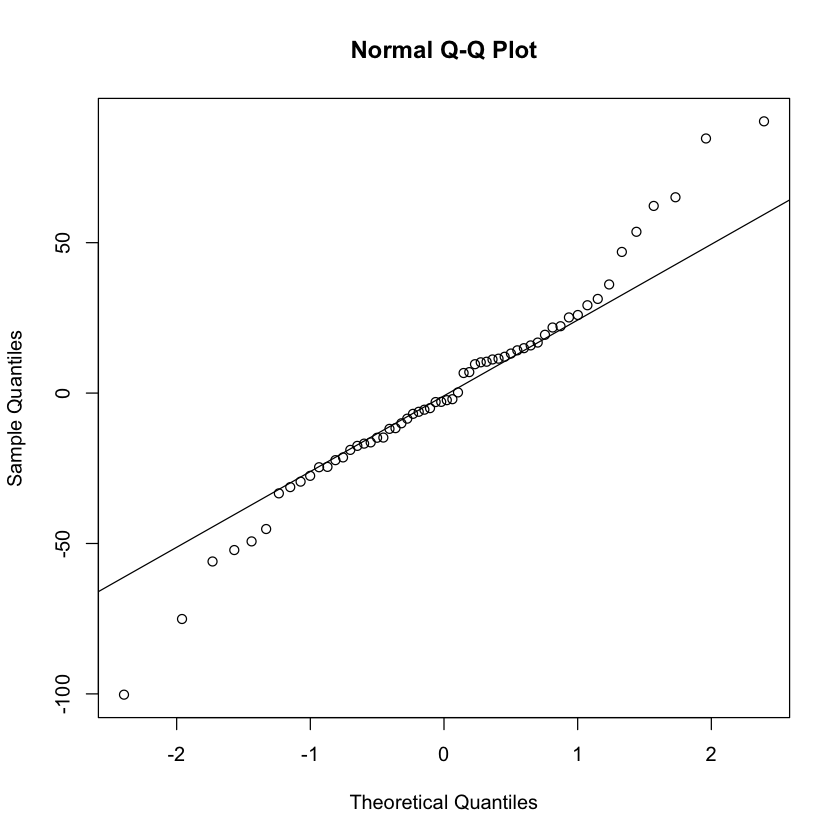

In [32]:
qqnorm(resid(lm.full))
qqline(resid(lm.full))

In [33]:
emmeans(lm.full, list(pairwise ~ Genotype | Treatment), adjust = "tukey")

$`emmeans of Genotype | Treatment`
Treatment = Vehicle:
 Genotype emmean   SE   df lower.CL upper.CL
 AA        193.3 24.4 3.28   119.19      267
 CC        174.3 24.4 3.28   100.24      248
 EIF2B2     92.5 31.9 6.63    16.05      169

Treatment = Thapsi:
 Genotype emmean   SE   df lower.CL upper.CL
 AA         80.3 24.4 3.28     6.26      154
 CC         70.8 24.4 3.28    -3.26      145
 EIF2B2     30.9 31.9 6.63   -45.48      107

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$`pairwise differences of Genotype | Treatment`
Treatment = Vehicle:
 2           estimate   SE   df t.ratio p.value
 AA - CC        18.95 29.1 8.15 0.650   0.7974 
 AA - EIF2B2   100.82 35.7 8.15 2.824   0.0517 
 CC - EIF2B2    81.87 35.7 8.15 2.293   0.1134 

Treatment = Thapsi:
 2           estimate   SE   df t.ratio p.value
 AA - CC         9.52 29.1 8.15 0.327   0.9433 
 AA - EIF2B2    49.42 35.7 8.15 1.384   0.3922 
 CC - EIF2B2    39.89 35.7 8.15 1.117   0.5302 

Degrees-of-free

In [34]:
emmeans(lm.full, list(pairwise ~ Treatment | Genotype), adjust = "tukey")

$`emmeans of Treatment | Genotype`
Genotype = AA:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle    193.3 24.4 3.28   119.19      267
 Thapsi      80.3 24.4 3.28     6.26      154

Genotype = CC:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle    174.3 24.4 3.28   100.24      248
 Thapsi      70.8 24.4 3.28    -3.26      145

Genotype = EIF2B2:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle     92.5 31.9 6.63    16.05      169
 Thapsi      30.9 31.9 6.63   -45.48      107

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$`pairwise differences of Treatment | Genotype`
Genotype = AA:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi    112.9 15.6 47 7.229   <.0001 

Genotype = CC:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi    103.5 15.6 47 6.625   <.0001 

Genotype = EIF2B2:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi     61.5 22.1 47 2.785   0.0077 

Degrees-of-freedom me